In [1]:
# ACO - ant colony optimization

In [2]:
import networkx as nx
import math

In [3]:
def euclid_distance(u_x: float,
                    u_y: float,
                    v_x: float,
                    v_y: float) -> float:
    return math.sqrt((u_x - v_x)**2 + (u_y - v_y)**2)

In [4]:
def read_instance(file_path: str) -> nx.Graph:
    with open(file_path, 'r') as f:
        g = nx.Graph()
        for line in f:
            if line[0].isdigit():
                node_id, x, y = [float(a) for a in line.split()]
                g.add_node(int(node_id) - 1, x=x, y=y)
        
        for u in range(len(g.nodes)):
            for v in range(u + 1, len(g.nodes)):
                weight = euclid_distance(g.nodes[u]['x'],
                                        g.nodes[u]['y'],
                                        g.nodes[v]['x'],
                                        g.nodes[v]['y'])
                g.add_edge(u, v,
                           weight=weight,
                           pheromones=0.1)
#                            pheromones=random.uniform(1e-3, 1e-2))
        
        return g

In [5]:
g = read_instance(file_path='dj38.tsp')

In [6]:
import random

In [7]:
def traverse(g, start_node, alpha, beta):
    
    cycle = [start_node]
    cycle_weight = 0
    visited = {start_node}
    u = start_node
    while len(visited) != len(g.nodes):
        neighbors = [v for v in g[u] if v not in visited]
        values = [g[u][v]['pheromones']**alpha / g[u][v]['weight']**beta for v in neighbors]
        chosen_neighbor = random.choices(neighbors, weights=values, k=1)[0]
        cycle.append(chosen_neighbor)
        visited.add(chosen_neighbor)
        cycle_weight += g[u][chosen_neighbor]['weight']
        u = chosen_neighbor
        
    cycle_weight += g[start_node][cycle[-1]]['weight']
    return cycle, cycle_weight

In [8]:
from matplotlib import pyplot as plt
from copy import deepcopy

In [9]:
def aco(g, num_ants, rho, num_iters, theta, alpha, beta):
    
    best_cycle_lens = []
    final_cycle = None
    for i in range(num_iters):
        cycles = [traverse(g, start_node=0, alpha=alpha, beta=beta) for _ in range(num_ants)]
        
#       smanjivanje feromona - "isparavanje"
        for u in range(len(g.nodes)):
            for v in range(u + 1, len(g.nodes)):
                g[u][v]['pheromones'] *= rho

#       dodavanje feromona
        for cycle, cycle_weight in cycles:
            delta = theta / cycle_weight # TODO za domaci theta se smanjuje kroz iteracije
            for u, v in zip(cycle[:-1], cycle[1:]):
                g[u][v]['pheromones'] += delta
            g[cycle[0]][cycle[-1]]['pheromones'] += delta
            
        best_cycle = min(cycles, key=lambda c: c[1])
        best_cycle_lens.append(best_cycle[1])
        if final_cycle is None or best_cycle[1] < final_cycle[1]:
            final_cycle = deepcopy(best_cycle)
    
    plt.plot(range(num_iters), best_cycle_lens)
    print(final_cycle[0])
    print(final_cycle[1])

[0, 1, 3, 2, 4, 5, 6, 8, 7, 12, 14, 19, 22, 24, 25, 21, 23, 27, 15, 16, 18, 17, 11, 10, 26, 30, 35, 33, 32, 37, 36, 34, 29, 31, 28, 20, 13, 9]
7029.683563198709


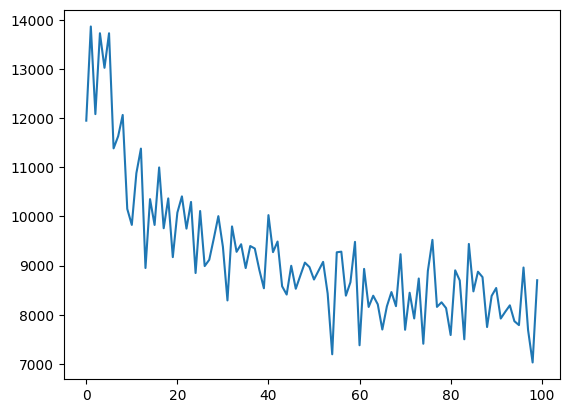

In [10]:
g = read_instance(file_path='dj38.tsp')
aco(g=g, num_ants=10, rho=0.9, num_iters=100, alpha=0.9, beta=1.5, theta=100.0)